## _Optimal location for the opening of a Natural store - Analysis of Cologne_

## Table of contents <a name="contents"></a>
* [1. Introduction: Background Discussion](#introduction)
* [2. Data Description](#data)
* [3. Methodology](#methodology)
 * [3.1. Library sources](#3.1)
 * [3.2. Districts and Boroughs](#3.2)
 * [3.3. Population per Borough](#3.3)
 * [3.4. Housing Information](#3.4)
 * [3.5. Venues - Exploring Boroughs of Cologne](#3.5)
 * [3.6. Venues - Analyzing each Borough](#3.6)
 * [3.7. Housing Information - Analyzing each Borough](#3.7)
* [4. Results](#results)
 * [4.1. Results from Venues Analysis](#4.1)
 * [4.2. Results from Housing Analysis](#4.2)
* [5. Discussion](#discussion)
* [6. Conclusion](#conclusion)

## 1. Introduction: Background Discussion <a name="introduction"></a>
Cologne or Köln is the largest city of Germany's most populous federal state North Rhine-Westphalia and the fourth most populous city in the entire Germany. With more than 1 million people registered in the city with 405.15 km2 and with a population density of 2,641 people per km2, Cologne is a multicultural city full of life.
Situated on the margins of the Rhine River, Cologne is divided into 9 boroughs (Stadtbezirke) and 85 districts (Stadtteile). Having also the seventh-largest airport in Germany, Cologne is best known for the Cologne Cathedral (Kölner Dom) and for being the center of the Carnival festivities, the largest carnival street festivals in Europe. With an enormous expat community this is a city full of life and multiple activities, that can group a multitype personalities. 
This study as the objective to fit in one of those personalities, on the holistically side of the spectrum, to find an optimal place to open a Natural store (Yoga studio with natural product sales/ coffee shop). The optimal place would be nearby a park/ green area with low offer of coffees nearby, so that people can enjoy the peace and tranquility that the store wants to transmit. 

##### 
[Back to the table of contents](#contents)

## 2. Data Description <a name="data"></a>

In order to develop this project, the data used is as follows:

* **Table of city district and boroughs**: Wikipedia page - list of city boroughs of Cologne. This information will be the setting stone of the project, as all remaining information will be joined to this base. https://de.wikipedia.org/wiki/

* **Inhabitants of Cologne - 2019**: City Population website. Our goal is to be able to map this information in a Choropleth Map in order to understand the dynamics of where do people tend to reside.

* **GeoJSON with the Boroughs of Düsseldorf**: Open Data Cologne. Which will be essential to create some Choropleth Maps. 

* **Venues of Cologne**: We will use the **FourSquare API** to retrieve the most common Venues of Cologne by borough.

##### 
[Back to the table of contents](#contents)

#### Import libraries and data

In [1]:
#IMPORT LIBRARIES NECESSARY
from IPython.display import display_html
from IPython.display import Image 
from IPython.core.display import HTML
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import urllib.request
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

import json

from geopy.geocoders import Nominatim
import geocoder
import sys

import folium

import requests
import random
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import credentials as cred

print('Libraries imported.')

Libraries imported.


In [2]:
url_wiki = 'https://de.wikipedia.org/wiki/Liste_der_Stadtbezirke_und_Stadtteile_K%C3%B6lns'
page = requests.get(url_wiki)

# Parsing through the URL
soup = BeautifulSoup(page.content, 'html.parser')
print("Data parsed.")

# Identify the table to scrap
right_table = soup.find('table', class_ = 'wikitable sortable')
print("Table located.")

Data parsed.
Table located.


In [3]:
df_koln = pd.read_html(url_wiki)[1]
df_koln.head()

,0,1,2,3,4
0,Nr.,Name,Einw.,Fläche km²,Einw./ km²
1,1,Stadtbezirk Innenstadt,127.033,1639,7.751
2,101,Altstadt-Süd,27.071,236,11.469
3,102,Neustadt-Süd,37.719,350,13.343
4,103,Altstadt-Nord,17.960,246,7.301


In [4]:
# Putting first row as a Header
new_header = df_koln.iloc[0]
df_koln = df_koln[1:]
df_koln.columns = new_header

df_koln.head(15)

,Nr.,Name,Einw.,Fläche km²,Einw./ km²
1,1,Stadtbezirk Innenstadt,127.033,1639,7.751
2,101,Altstadt-Süd,27.071,236,11.469
3,102,Neustadt-Süd,37.719,350,13.343
4,103,Altstadt-Nord,17.960,246,7.301
5,104,Neustadt-Nord,28.720,283,8.213
6,105,Deutz,15.563,524,2.968
7,2,Stadtbezirk Rodenkirchen,100.936,5462,1.848
8,201,Bayenthal,8.473,128,6.600
9,202,Marienburg (Köln),5.636,305,1.848
10,203,Raderberg,5.625,084,6.727


In [5]:
df_koln.drop(df_koln[df_koln['Nr.'].str.len() < 2].index, inplace = True) 
df_koln.head()

,Nr.,Name,Einw.,Fläche km²,Einw./ km²
2,101,Altstadt-Süd,27.071,236,11.469
3,102,Neustadt-Süd,37.719,350,13.343
4,103,Altstadt-Nord,17.960,246,7.301
5,104,Neustadt-Nord,28.720,283,8.213
6,105,Deutz,15.563,524,2.968


In [6]:
df_koln.rename(columns={df_koln.columns[0]:"Number"}, inplace=True)
df_koln.rename(columns={df_koln.columns[1]:"Borough"}, inplace=True)
df_koln.rename(columns={df_koln.columns[2]:"Population"}, inplace=True)
df_koln.rename(columns={df_koln.columns[3]:"Area km2"}, inplace=True)
df_koln.rename(columns={df_koln.columns[4]:"Population by area"}, inplace=True)


df_koln.head()

,Number,Borough,Population,Area km2,Population by area
2,101,Altstadt-Süd,27.071,236,11.469
3,102,Neustadt-Süd,37.719,350,13.343
4,103,Altstadt-Nord,17.960,246,7.301
5,104,Neustadt-Nord,28.720,283,8.213
6,105,Deutz,15.563,524,2.968


In [7]:
df_koln.to_csv(r'C:\Users\Martha\PythonProjects\1_IBM\1_Data_Science\course_9\capstone\Capstone-Project\cologne.csv')

#### Getting the Coordinates for Cologne and each borough

**Use geopy library to get the latitude and longitude values of Cologne (Köln)**

In [8]:
# Getting coordinates for Cologne
address = 'Cologne, Germany'
#g = geocoder.osm('Cologne, Germany')
#g.json
geolocator = Nominatim(user_agent="Cologne_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cologne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cologne are 50.938361, 6.959974.


In [9]:
city = 'Cologne, Germany'
boroughs = df_koln['Borough']
coord = {'latitude':[],'longitude':[]}
for borough in boroughs:
    address = borough + ', ' + city
    location = geolocator.geocode(address)
    lat = location.latitude
    coord['latitude'].append(lat)
    lng = location.longitude
    coord['longitude'].append(lng)
    
    print(address, lat, lng)

Altstadt-Süd, Cologne, Germany 50.929181150000005 6.955329090575393
Neustadt-Süd, Cologne, Germany 50.92655975 6.9404063381425605
Altstadt-Nord, Cologne, Germany 50.9422647 6.953187640262971
Neustadt-Nord, Cologne, Germany 50.94790635 6.941059308417779
Deutz, Cologne, Germany 50.9367586 6.9730461
Bayenthal, Cologne, Germany 50.9110582 6.9692379
Marienburg (Köln), Cologne, Germany 50.9014892 6.9774565
Raderberg, Cologne, Germany 50.9079878 6.9611688
Raderthal, Cologne, Germany 50.9006829 6.9548551
Zollstock, Cologne, Germany 50.9098693 6.941747
Rondorf, Cologne, Germany 50.873124 6.9548745
Hahnwald, Cologne, Germany 50.8738192 6.9789269
Rodenkirchen, Cologne, Germany 50.87875 6.981804397809072
Weiß, Cologne, Germany 50.8727823 7.0288463
Sürth, Cologne, Germany 50.8622727 7.0067734
Godorf, Cologne, Germany 50.8491543 6.9753497
Immendorf, Cologne, Germany 50.85939 6.9578092
Meschenich, Cologne, Germany 50.8605854 6.9272589
Klettenberg, Cologne, Germany 50.9098095 6.924653
Sülz, Cologne, G

In [10]:
#saved the data to a CSV file in case of future problems running the coordinates

#df_koln.to_csv(r'C:\Users\Martha\PythonProjects\1_IBM\1_Data_Science\course_9\capstone\Capstone-Project\cologne_coord.csv')

#Only uncomment this if the previous 2 cells cannot run - it will read 
#df_koln = pd.read_csv(r'C:\Users\Martha\PythonProjects\1_IBM\1_Data_Science\course_9\capstone\Capstone-Project\cologne_coord.csv')

In [11]:
# Adding the coordinates to the main dataframe and check the information

df_koln['Latitude'] = coord['latitude']
df_koln['Longitude'] = coord['longitude']
df_koln.head()

,Number,Borough,Population,Area km2,Population by area,Latitude,Longitude
2,101,Altstadt-Süd,27.071,236,11.469,50.929181,6.955329
3,102,Neustadt-Süd,37.719,350,13.343,50.926560,6.940406
4,103,Altstadt-Nord,17.960,246,7.301,50.942265,6.953188
5,104,Neustadt-Nord,28.720,283,8.213,50.947906,6.941059
6,105,Deutz,15.563,524,2.968,50.936759,6.973046


In [12]:
# create map of Cologne using latitude and longitude values

map_cologne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, nr, borough in zip(df_koln['Latitude'], df_koln['Longitude'], df_koln['Number'], df_koln['Borough']):
    label = '{}, {}'.format(nr, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cologne)  
    
map_cologne

#### Get the Population values

In [13]:
df_koln['Population'] = df_koln['Population'].str.replace(".","").astype(int)
df_koln

,Number,Borough,Population,Area km2,Population by area,Latitude,Longitude
2,101,Altstadt-Süd,27071,236,11.469,50.929181,6.955329
3,102,Neustadt-Süd,37719,350,13.343,50.926560,6.940406
4,103,Altstadt-Nord,17960,246,7.301,50.942265,6.953188
5,104,Neustadt-Nord,28720,283,8.213,50.947906,6.941059
6,105,Deutz,15563,524,2.968,50.936759,6.973046
8,201,Bayenthal,8473,128,6.600,50.911058,6.969238
9,202,Marienburg (Köln),5636,305,1.848,50.901489,6.977456
10,203,Raderberg,5625,084,6.727,50.907988,6.961169
11,204,Raderthal,4713,321,1.469,50.900683,6.954855
12,205,Zollstock,21122,504,4.195,50.909869,6.941747


In [14]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/cologne.geojson -O cologne.geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [15]:
cologne_geo = r'cologne.geojson' # geojson file

def boroughs_style(feature):
    return { 'color': 'grey', 'fill': False, 'line_weight' : 0.2, 'line_opacity': 0.5  }
#create a plain map
cologne_map = folium.Map(location=[latitude, longitude], zoom_start=11)

In [16]:
# create a numpy array of length 8 and has linear spacing from the minium total population to the maximum total population
threshold_scale = np.linspace(df_koln['Population'].min(),
                              df_koln['Population'].max(),
                              8, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum population
# generate choropleth map using the population of Cologne

choropleth = folium.Choropleth(
    geo_data = cologne_geo,
    name = 'choropleth',
    data = df_koln,
    columns=['Borough', 'Population'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    highlight=True,
    legend_name = 'Population of Cologne'
).add_to(cologne_map)

# Let's add the Boroughs Labels
#choropleth.geojson.add_child(
#    folium.features.GeoJsonTooltip(['name'],labels=False)
#)
                                                              
# Add Layer Control                                                                  
folium.LayerControl().add_to(cologne_map)
cologne_map

In [17]:
cologne_geo = r'cologne.json' # geojson file

def boroughs_style(feature):
    return { 'color': 'purple', 'fill': False, 'line_weight' : 1.2, 'line_opacity': 0.1  }

# create a plain map of Cologne
cologne_map = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df_koln['Latitude'], df_koln['Longitude'], df_koln['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cologne_map) 
    
    
cologne_map

In [18]:
cologne_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_koln['Latitude'], df_koln['Longitude'], df_koln['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(cologne_map)  
    
cologne_map

**Define Foursquare Credentials and Version**

In [19]:
# Access Class file with Foursquare Credentials
cred = cred.Cred
print('Foursquare credentials imported from Class file.')

Foursquare credentials imported from Class file.


In [21]:
LIMIT = 150

#results # Uncomente if needed

In [22]:
df_koln.loc[2, 'Borough']
neighborhood_latitude = df_koln.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_koln.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_koln.loc[2, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Altstadt-Süd are 50.929181150000005, 6.955329090575393.


In [23]:
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    cred.CLIENT_ID, 
    cred.CLIENT_SECRET, 
    cred.VERSION,
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()
#results

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
nearby_venues.head()

,name,categories,lat,lng
0,Motel One Köln-Waidmarkt,Hotel,50.931557,6.954513
1,Toscanini,Italian Restaurant,50.925644,6.957099
2,Adagio Köln City,Hotel,50.931987,6.954941
3,Mercure Hotel Severinshof Köln City,Hotel,50.929430,6.956916
4,Motel One Lounge,Lounge,50.931571,6.954438


In [25]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head(10)

,name,categories,lat,lng
0,Motel One Köln-Waidmarkt,Hotel,50.931557,6.954513
1,Toscanini,Italian Restaurant,50.925644,6.957099
2,Adagio Köln City,Hotel,50.931987,6.954941
3,Mercure Hotel Severinshof Köln City,Hotel,50.929430,6.956916
4,Motel One Lounge,Lounge,50.931571,6.954438
5,Jogisushi,Sushi Restaurant,50.932899,6.956784
6,Pausenzeit,Bagel Shop,50.930088,6.957170
7,Kaffeeprinzen,Café,50.928887,6.950101
8,ODEON-Lichtspieltheater,Movie Theater,50.925299,6.958306
9,Rheinau,Restaurant,50.926974,6.961394


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

39 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(cred.CLIENT_ID, cred.CLIENT_SECRET, cred.VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
# Run previously created function on all Neighborhoods and save the result in a DataFrame
cologne_venues = getNearbyVenues(names=df_koln['Borough'],
                                 latitudes=df_koln['Latitude'],
                                 longitudes=df_koln['Longitude']
                                  )
print('Venues in DataFrame')

Altstadt-Süd
Neustadt-Süd
Altstadt-Nord
Neustadt-Nord
Deutz
Bayenthal
Marienburg (Köln)
Raderberg
Raderthal
Zollstock
Rondorf
Hahnwald
Rodenkirchen
Weiß
Sürth
Godorf
Immendorf
Meschenich
Klettenberg
Sülz
Lindenthal
Braunsfeld
Junkersdorf
Müngersdorf
Weiden
Lövenich
Widdersdorf
Ehrenfeld
Neuehrenfeld
Bickendorf
Vogelsang
Bocklemünd/Mengenich
Ossendorf
Nippes
Mauenheim
Riehl
Weidenpesch
Longerich
Niehl
Bilderstöckchen
Merkenich
Fühlingen
Seeberg
Heimersdorf
Lindweiler
Pesch
Esch/Auweiler
Volkhoven/Weiler
Chorweiler
Blumenberg
Roggendorf/Thenhoven
Worringen
Poll
Westhoven
Ensen
Gremberghoven
Eil
Porz
Urbach
Elsdorf
Grengel
Wahnheide
Wahn
Lind
Libur
Zündorf
Langel
Finkenberg
Humboldt/Gremberg
Kalk
Vingst
Höhenberg
Ostheim
Merheim
Brück
Rath/Heumar
Neubrück
Mülheim
Buchforst
Buchheim
Holweide
Dellbrück
Höhenhaus
Dünnwald
Stammheim
Flittard
Stadt Köln
Venues in DataFrame


In [29]:
print(cologne_venues.shape)
cologne_venues.rename(columns={cologne_venues.columns[0]:"Borough"}, inplace=True)

cologne_venues.head()

(916, 7)


,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Süd,50.929181,6.955329,Motel One Köln-Waidmarkt,50.931557,6.954513,Hotel
1,Altstadt-Süd,50.929181,6.955329,Toscanini,50.925644,6.957099,Italian Restaurant
2,Altstadt-Süd,50.929181,6.955329,Adagio Köln City,50.931987,6.954941,Hotel
3,Altstadt-Süd,50.929181,6.955329,Mercure Hotel Severinshof Köln City,50.929430,6.956916,Hotel
4,Altstadt-Süd,50.929181,6.955329,Motel One Lounge,50.931571,6.954438,Lounge


Getting total number of venues per Borough

In [30]:
tt_venues = cologne_venues.groupby('Borough').count()
tt_venues = tt_venues.sort_values(by=['Venue Category'], axis=0, ascending=True, inplace=False, kind='quicksort')

# Check how many different categories have been found 
print('There are {} uniques categories.'.format(len(cologne_venues['Venue Category'].unique())))

There are 198 uniques categories.


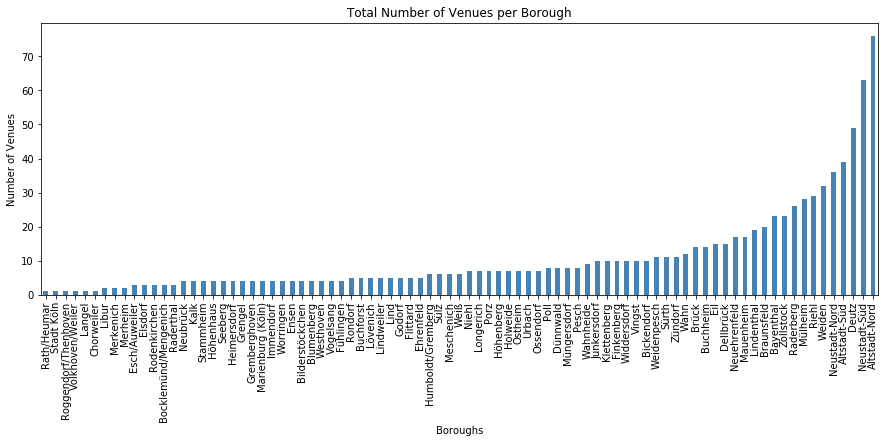

In [31]:
# Plotting the information 
tt_venues['Venue Category'].plot(kind='bar', 
                                 figsize=(15, 5),
                                color = 'steelblue')

plt.title('Total Number of Venues per Borough') # add a title to the histogram
plt.ylabel('Number of Venues') # add y-label
plt.xlabel('Boroughs') # add x-label

plt.show()

In [32]:
map_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map 
for lat, lng, name, category in zip(cologne_venues['Venue Latitude'], cologne_venues['Venue Longitude'], cologne_venues['Borough'],cologne_venues['Venue Category']):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)  
    
# Add Boroughs borders to the map
folium.GeoJson(cologne_geo, style_function = boroughs_style, name = 'geojson').add_to(map_venues)
    
map_venues

FileNotFoundError: [Errno 2] No such file or directory: 'cologne.json'

In [ ]:
cologne_venues.groupby('Borough').count()

In [ ]:
print('There are {} uniques categories.'.format(len(cologne_venues['Venue Category'].unique())))

In [ ]:
#One hot Encoding
cologne_onehot = pd.get_dummies(cologne_venues[['Venue Category']], prefix="", prefix_sep="")

#Add Neighborhood column in DataFrame
cologne_onehot['Neighborhood'] = cologne_venues['Borough']

#Move Neighborhood column as a first column
fixed_columns = [cologne_onehot.columns[-1]] + list(cologne_onehot.columns[:-1])
cologne_onehot = cologne_onehot[fixed_columns]

cologne_onehot.head()

In [ ]:
#Check the size of data colected
cologne_onehot.shape

In [ ]:
#Group by Neighborhood and check the mean value for the venues
cologne_grouped = cologne_onehot.groupby('Neighborhood').mean().reset_index()
cologne_grouped.head(10)

In [ ]:
#Confirm size 
cologne_grouped.shape

In [ ]:
#Print each Neighborhood along with the 5 most common venues
num_top_venues = 5

for hood in cologne_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cologne_grouped[cologne_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

#### Getting venues for all of the boroughs into a CSV

In [ ]:
cologne_grouped.to_csv(r'C:\Users\Martha\PythonProjects\1_IBM\1_Data_Science\course_9\capstone\Capstone-Project\cologne_venues.csv')